#K-means clustering

6890 7


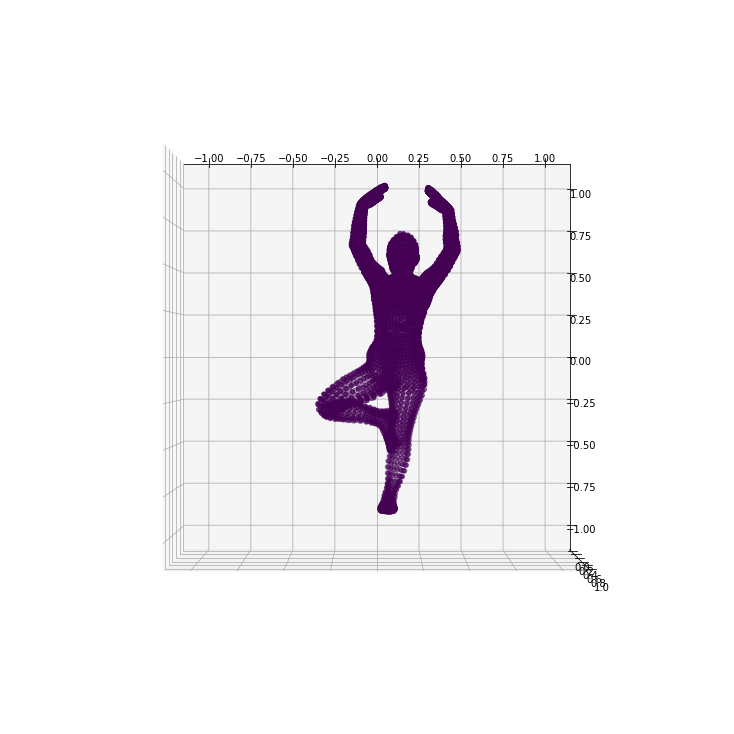

In [ ]:
import numpy as np
from utils import read_off, obtain_features, plot_shape
from scipy.spatial.distance import cdist

# Load the dataset and obtain the shape features using the utils in the data folder
with open('./data/tr_reg_057.off') as file:
    m1_v, m1_f = read_off(file)
features = obtain_features(m1_v, m1_f, 7)

# Extract number of features and number of objects
nobj, nfeat = features.shape
print(nobj, nfeat)

# Make a 3D plot of my shape
plot_shape(m1_v,np.ones((nobj,)))

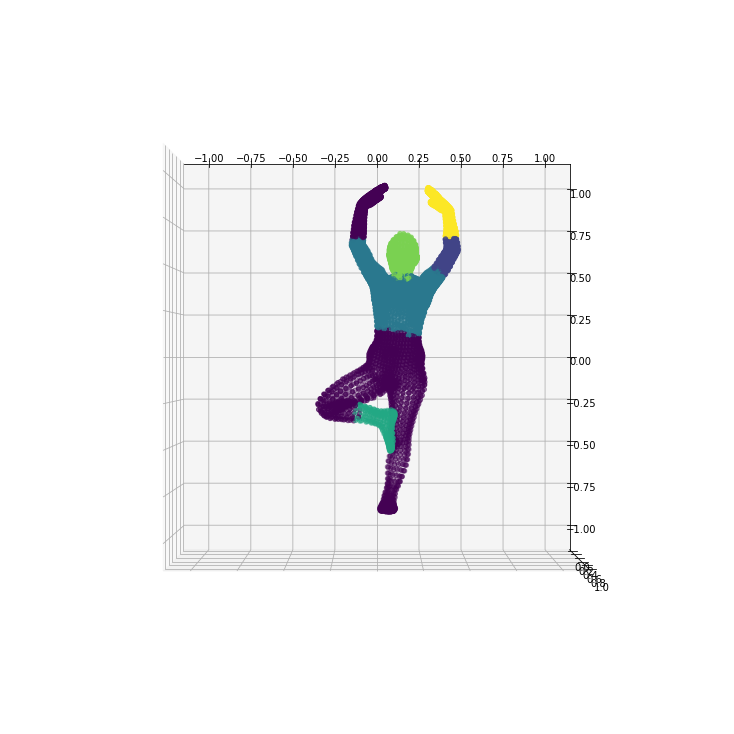

In [ ]:
# Implementation of K-means
# Step 1.1: Random Init and intial random clustering
np.random.seed(1)
k = 6
max_iter = 500

# 1: Randomly choose centroids
initial_cluster_idx = np.random.choice(len(features), k, replace=False)
centroids = features[initial_cluster_idx, :]  # Step 1

# 2: Find the distance between centroids and all the data points
distances = cdist(features, centroids, 'euclidean')  # Step 2

# 3: Assign to cluster based on minimum distance with the centroid
labels = np.array([np.argmin(i) for i in distances])  # Step 3

plot_shape(m1_v, np.reshape(labels, (6890, 1)))

0/500
1/500
2/500
3/500
4/500
5/500
6/500
7/500
8/500
9/500
10/500
11/500
12/500
13/500
14/500
15/500
16/500
17/500
18/500
19/500
20/500
21/500
22/500
23/500
24/500
25/500
26/500
27/500
28/500
29/500
30/500
31/500
32/500
33/500
34/500
35/500
36/500
37/500
38/500
39/500
40/500
41/500
42/500
43/500
44/500
45/500
46/500
47/500
48/500
49/500
Reached convergence at iteration nr 49


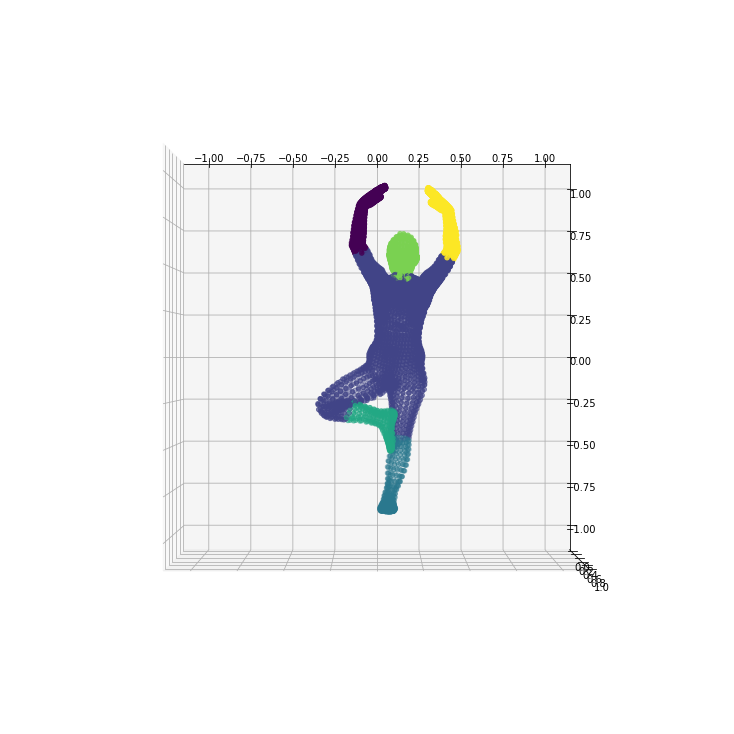

In [ ]:
# Repeat until convergence
for it in range(max_iter):
    print('{}/{}'.format(it, max_iter))
    centroids = []
    for idx in range(k):
        # Update centroids by taking the mean of the cluster it represents 
        temp_cent = features[labels == idx].mean(axis=0)
        centroids.append(temp_cent)

    centroids = np.vstack(centroids)  # Updated Centroids

    distances = cdist(features, centroids, 'euclidean')

    old_labels = labels.copy()
    labels = np.array([np.argmin(i) for i in distances])

    # Check for convergence
    if all(labels == old_labels):
        print('Reached convergence at iteration nr', it)
        break

# 3. Display the final clustering and the segmented shape
plot_shape(m1_v, np.reshape(labels, (6890, 1)))

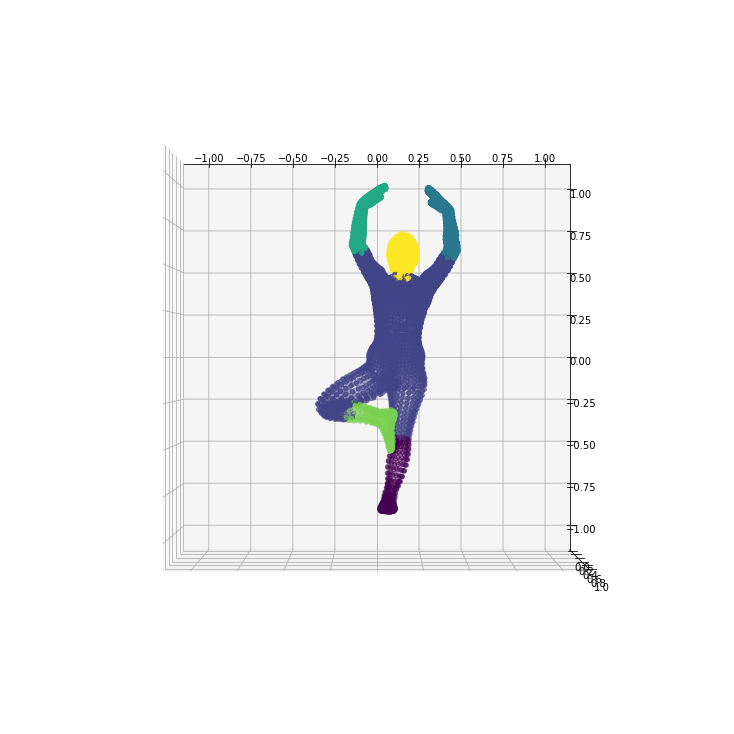

In [ ]:
# 4. Implementation using sklearn:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

# Init estimator and fit it on the data
sk_kmeans = KMeans(n_clusters=k, max_iter=max_iter).fit(features)

# Get predicted labels and centroids
sk_labels = sk_kmeans.labels_
sk_centroids = sk_kmeans.cluster_centers_

# Display the final clustering and the segmented shape and print the centroids
plot_shape(m1_v, np.reshape(sk_labels,(6890,1)))

Try out the other shapes within the data folder and have some fun exploring the plotting functions if you find them interesting!

In [ ]:
# TODO: Add clustering on 3D coords